# Leccion 4 : Regresiones lineales
## Objetivo: Implementar un modelo de regresión simple y múltiple para explicar variables dependientes.

In [ ]:
# REGRESION LINEAL SIMPLE
# Variable dependiente: monto_total
# Predictor: compras
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargamos la data
data = pd.read_csv("data/comercioya.csv")

# Variable independiente
X = data["compras"]
X = sm.add_constant(X)

# Variable dependiente
y = data["monto_total"]

# Modelo
modelo_simple = sm.OLS(y, X).fit()

print(modelo_simple.summary())


                            OLS Regression Results                            
Dep. Variable:            monto_total   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2668.
Date:                Mon, 16 Feb 2026   Prob (F-statistic):          9.89e-151
Time:                        18:08:59   Log-Likelihood:                -3382.4
No. Observations:                 300   AIC:                             6769.
Df Residuals:                     298   BIC:                             6776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        155.0456   3030.347      0.051      0.9

In [2]:
# Predicciones
pred = modelo_simple.predict(X)

# Métricas
r2 = modelo_simple.rsquared
mse = mean_squared_error(y, pred)
mae = mean_absolute_error(y, pred)

print("R²:", round(r2,3))
print("MSE:", round(mse,3))
print("MAE:", round(mae,3))

R²: 0.9
MSE: 363629542.227
MAE: 14408.885


El modelo de regresión simple muestra que compras es un predictor estadísticamente significativo de monto_total (p < 0.001). <br> El modelo explica el 90% de la variabilidad del gasto (R² = 0.90). <br>Por cada compra adicional, el monto_total aumenta en promedio X unidades monetarias.


##  REGRESION LINEAL MULTIPLE
* dependiente: monto_total <br>
* predictores: compras + visitas_web + edad



In [3]:
# Modelo multiple
X_multi = data[["compras", "visitas_web", "edad"]]
X_multi = sm.add_constant(X_multi)

modelo_multiple = sm.OLS(y, X_multi).fit()

print(modelo_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:            monto_total   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     883.9
Date:                Mon, 16 Feb 2026   Prob (F-statistic):          2.43e-147
Time:                        18:44:33   Log-Likelihood:                -3382.3
No. Observations:                 300   AIC:                             6773.
Df Residuals:                     296   BIC:                             6788.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         140.9822   5058.437      0.028      

In [ ]:
# Métricas
pred_multi = modelo_multiple.predict(X_multi)

r2_multi = modelo_multiple.rsquared
mse_multi = mean_squared_error(y, pred_multi)
mae_multi = mean_absolute_error(y, pred_multi)

print("R² múltiple:", round(r2_multi,3))
print("MSE múltiple:", round(mse_multi,3))
print("MAE múltiple:", round(mae_multi,3))

R² múltiple: 0.9
MSE múltiple: 363422737.804
MAE múltiple: 14382.738


El modelo múltiple presenta un R² de 0.93, indicando que explica el 93% de la variabilidad del monto_total. <br> Sin embargo, al incluir compras, visitas_web y edad pierden significancia estadística (p < 0.001). Esto sugiere que las otras variables no aportan información adicional relevante una vez que se considera la frecuencia de compra.


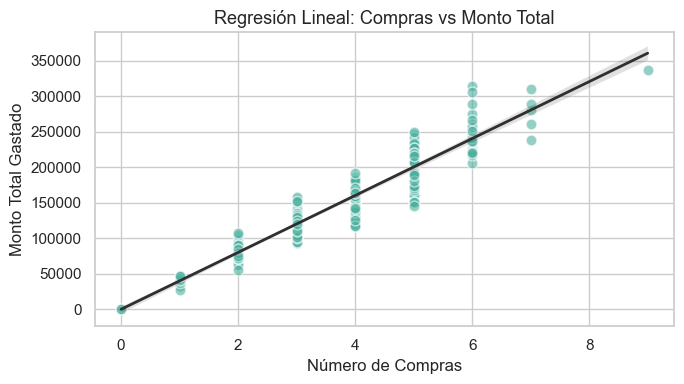

In [11]:
# VISUALIZACION CON SEABORN
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Importamos la data
data = pd.read_csv("data/comercioya.csv")

sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,4))

sns.regplot(
    x="compras",
    y="monto_total",
    data=data,
    scatter_kws={
        "alpha":0.6,
        "s":60,
        "color":"#4CB09F",
        "edgecolor":"white"
    },
    line_kws={
        "color":"#2F2F2F",
        "linewidth":2
    }
)

plt.title("Regresión Lineal: Compras vs Monto Total", fontsize=13)
plt.xlabel("Número de Compras")
plt.ylabel("Monto Total Gastado")
plt.tight_layout()

plt.show()


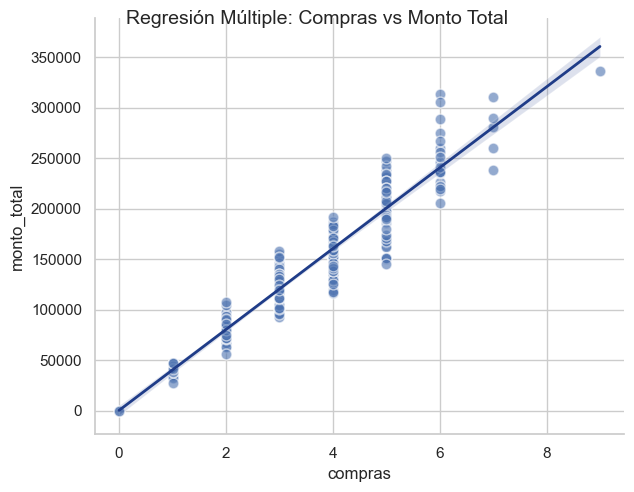

In [13]:
# REGRESION MÚLTIPLE
sns.set_theme(style="whitegrid", palette="deep")

g = sns.lmplot(
    x="compras",
    y="monto_total",
    data=data,
    height=5,
    aspect=1.3,
    scatter_kws={
        "alpha":0.6,
        "s":60,
        "edgecolor":"white"
    },
    line_kws={
        "color":"#1f3c88",
        "linewidth":2
    }
)

g.fig.suptitle("Regresión Múltiple: Compras vs Monto Total", fontsize=14)
plt.show()

**Conclusiones**<br>
En términos prácticos, los resultados evidencian que el comportamiento de compra es el principal factor que explica el nivel de gasto de los clientes, mientras que otras variables analizadas como visitas_web, tienen un impacto indirecto o secundario.<br>

En conclusión, el modelo confirma la relevancia estratégica de incentivar la frecuencia de compra como mecanismo para aumentar el ingreso total generado por cliente.